In [1]:
from kan import create_dataset, KAN
import openai
import LLMSR
from LLMSR.kansr import KANSR
import torch
import os
import matplotlib.pyplot as plt

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
LLMSR.llm.check_key_limit(client)

2025-03-12 19:04:34,948 - LLMSR.llm - INFO - API key check successful. Remaining limit: None


# Try library

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KAN(width=[1,4,1], grid=7, k=3, seed=10, device=device, symbolic_enabled=False)
kan_sr = KANSR(model=model, client=client)

# create dataset
f = lambda x: (x**3 + torch.pi)**2
ranges = [-2, 2]
dataset = kan_sr.create_dataset(f, n_var=1, ranges=ranges, train_num=10000, test_num=1000)

checkpoint directory created: ./model
saving model version 0.0


2025-03-12 19:04:34,968 - LLMSR.kansr - INFO - Training KAN model with LBFGS optimizer for 50 steps
| train_loss: 2.09e-02 | test_loss: 2.00e-02 | reg: 2.90e+01 | : 100%|█| 50/50 [00:35<00:00,  1.41it


saving model version 0.1
Unpruned model. Pruning? True


2025-03-12 19:05:10,970 - LLMSR.kansr - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-03-12 19:05:10,984 - LLMSR.kansr - INFO - Pruned model:
2025-03-12 19:05:11,126 - LLMSR.kansr - INFO - Final train loss: 0.020871156826615334


saving model version 0.2


0.020871156826615334

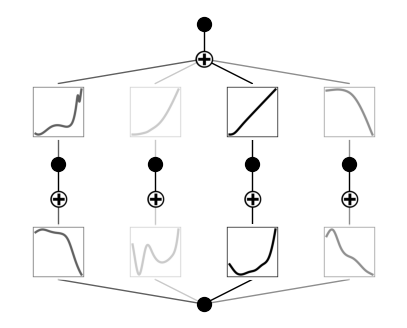

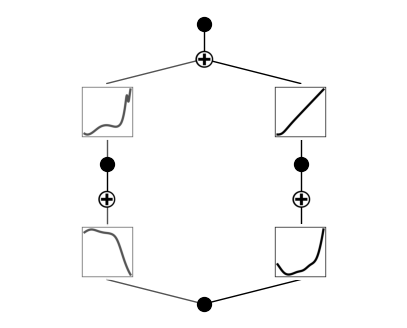

In [4]:
# # train KAN
kan_sr.train_kan(dataset,prune=True, steps=50)


2025-03-12 19:05:12,105 - LLMSR.llm - INFO - API key usage check successful. Current usage: 41.359607146
2025-03-12 19:05:12,243 - LLMSR.kansr - INFO - Using n_chi_squared from model predictions as exit condition: 0.9910090565681458
2025-03-12 19:05:12,244 - LLMSR.kansr - INFO - Converting KAN model to symbolic expressions (exit_condition=0.9910090565681458)
2025-03-12 19:05:13,028 - LLMSR.llm - INFO - API key usage check successful. Current usage: 41.359607146
2025-03-12 19:05:13,032 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-12 19:05:13,033 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


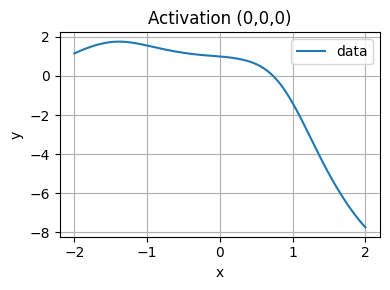

2025-03-12 19:05:13,131 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-12 19:05:13,264 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -2.780191659927368, for constant: [-0.41075412]
2025-03-12 19:05:13,264 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 19:05:16,862 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-12 19:05:16,882 - LLMSR.llmSR - INFO - Initial population best: score=-0.005056873429566622, params=[ 0.72906837  2.57530687 -1.17721547 -1.90979811  1.14867856], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-12 19:05:16,903 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-12 19:05:16,903 - LLMSR.llmSR - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 10
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 10 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 10 succeeded, 0 failed (100.00% success)
  Function Conversion: 10 succeeded, 0 failed (100.00% success)
  Curve Fitting: 10 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4], with score -0.005056873429566622 and parameters [ 0.729  2.575 -1.177 -1.91   1.149]


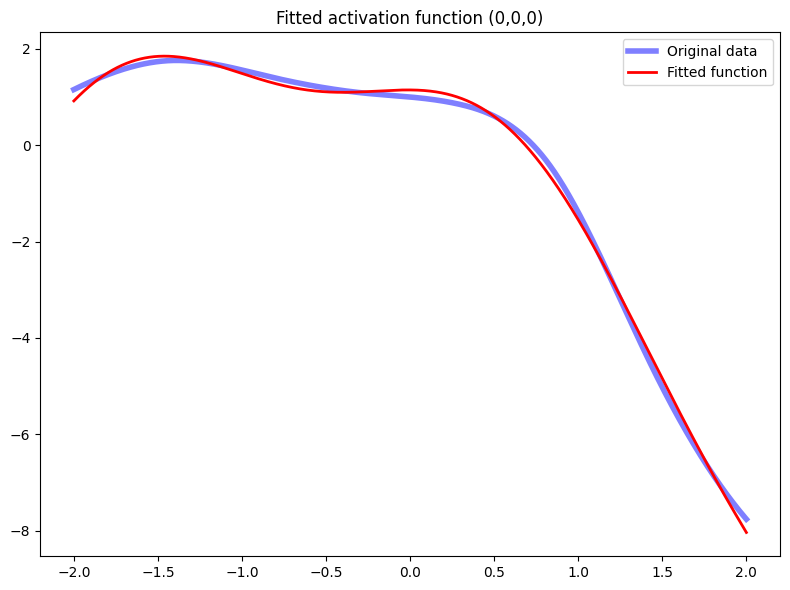

2025-03-12 19:05:17,179 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


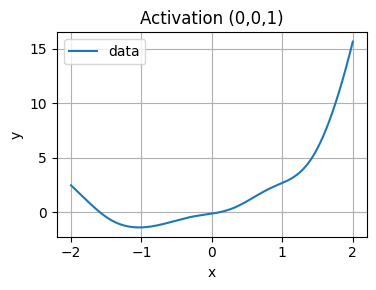

2025-03-12 19:05:17,364 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-12 19:05:17,365 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -3.705584764480591, for constant: [1.81848362]
2025-03-12 19:05:17,365 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 19:05:19,603 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-12 19:05:19,604 - LLMSR.llmSR - INFO - Initial population best: score=-0.11953359097242355, params=[-2.30619859  0.86234597  1.64756392], ansatz: params[0] + params[1] * x**2 + params[2] * np.exp(x)...
2025-03-12 19:05:19,605 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-12 19:05:19,605 - LLMSR.llmSR - INFO - Successfully found expression for connection (0,0,1)



API Call Statistics:
  Successful calls (end-to-end): 10
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 10 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 10 succeeded, 0 failed (100.00% success)
  Function Conversion: 10 succeeded, 0 failed (100.00% success)
  Curve Fitting: 10 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,1): params[0] + params[1] * x**2 + params[2] * np.exp(x), with score -0.11953359097242355 and parameters [-2.306  0.862  1.648]


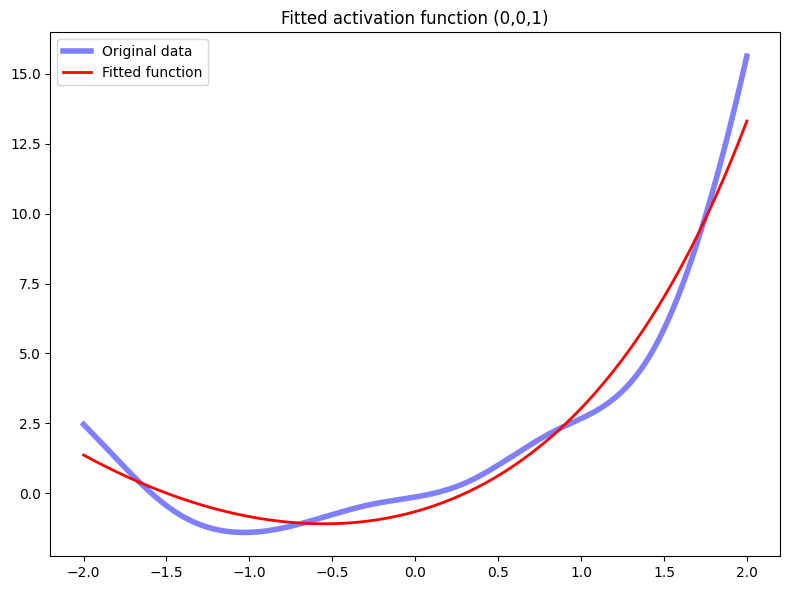

2025-03-12 19:05:19,687 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


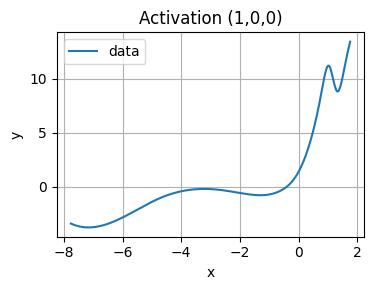

2025-03-12 19:05:19,758 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-12 19:05:19,760 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -5.782105445861816, for constant: [6.42837351]
2025-03-12 19:05:19,760 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 19:05:27,461 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-12 19:05:27,462 - LLMSR.llmSR - INFO - Initial population best: score=-0.2681918740272522, params=[ 2.10228     1.19418974  6.02964905  0.45207072 -2.46142441], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4]...
2025-03-12 19:05:27,463 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-12 19:05:27,463 - LLMSR.llmSR - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 10
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 10 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 10 succeeded, 0 failed (100.00% success)
  Function Conversion: 10 succeeded, 0 failed (100.00% success)
  Curve Fitting: 10 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,0,0): params[0] * np.sin(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4], with score -0.2681918740272522 and parameters [ 2.102  1.194  6.03   0.452 -2.461]


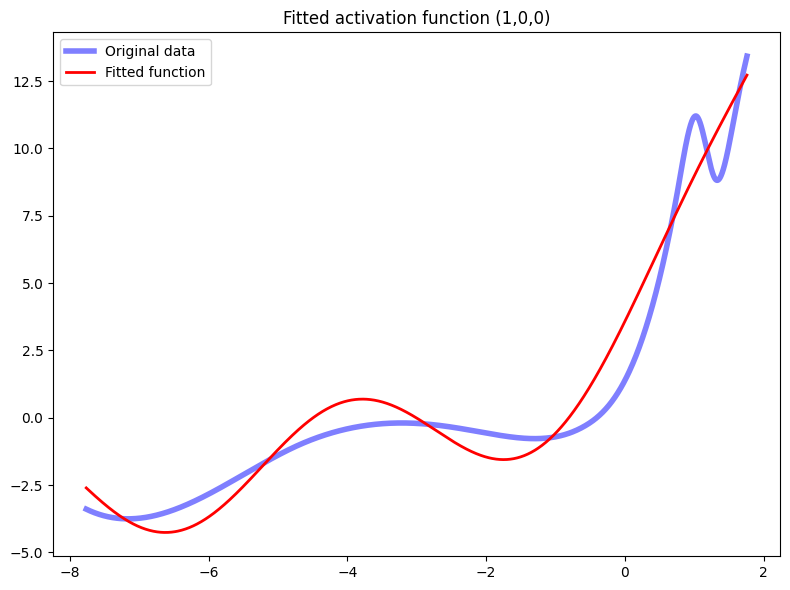

2025-03-12 19:05:27,543 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


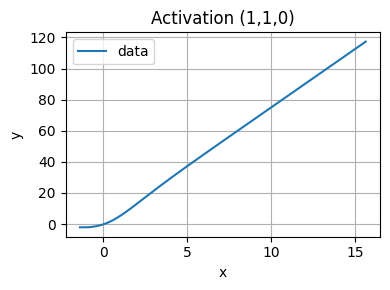

2025-03-12 19:05:27,622 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-12 19:05:27,624 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -26.5799617767334, for constant: [14.82517086]
2025-03-12 19:05:27,625 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-12 19:05:29,527 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-12 19:05:29,527 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-12 19:05:29,528 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-12 19:05:29,528 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-12 19:05:29,529 - LLMSR.fit - WARNING - curve fitting: Covariance of the parameters could not be estimated
2025-03-12 19:05:29,530 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-12 19:05:29,718 - LLMSR.fit - WARNING - curve fitting: invalid value en


API Call Statistics:
  Successful calls (end-to-end): 10
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 10 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 10 succeeded, 0 failed (100.00% success)
  Function Conversion: 10 succeeded, 0 failed (100.00% success)
  Curve Fitting: 10 succeeded, 0 failed (100.00% success)

Error types:
  No errors

Validation issues:
  - nan values: 9

Fitting warnings:
  - covariance estimation: 9
  - invalid log: 46
Approximation for (1,1,0): params[0] * x**2 + params[1] * x + params[2], with score -0.19466036558151245 and parameters [0.115 5.922 2.091]


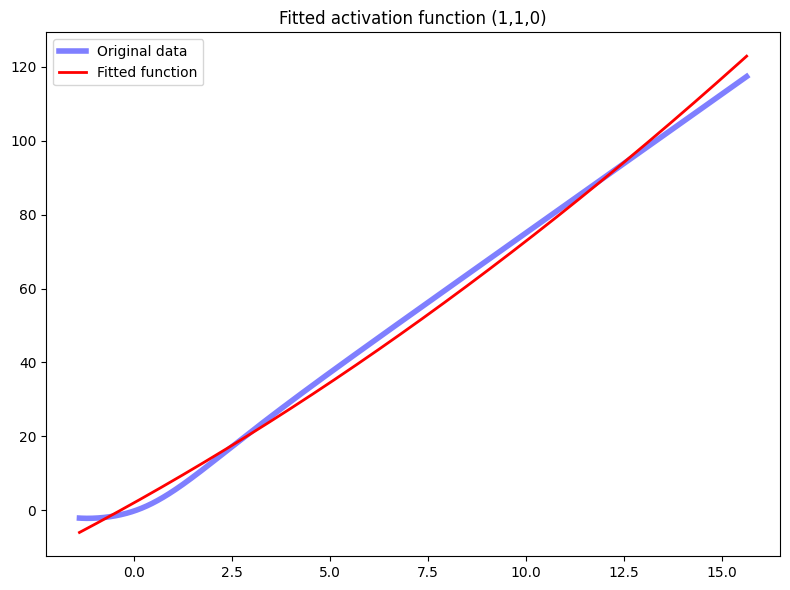

2025-03-12 19:05:30,859 - LLMSR.llmSR - INFO - KAN conversion complete: 4 total connections
2025-03-12 19:05:30,860 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-03-12 19:05:31,335 - LLMSR.llm - INFO - API key usage check successful. Current usage: 41.412762146
2025-03-12 19:05:31,336 - LLMSR.llmSR - INFO - API key usage whilst this was running: $0.05
2025-03-12 19:05:31,337 - LLMSR.kansr - INFO - Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4], has parameters [ 0.7  2.6 -1.2 -1.9  1.1]
2025-03-12 19:05:31,338 - LLMSR.kansr - INFO - Approximation for (0, 0, 1): params[0] + params[1] * x**2 + params[2] * np.exp(x), has parameters [-2.3  0.9  1.6]
2025-03-12 19:05:31,339 - LLMSR.kansr - INFO - Approximation for (1, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4], has parameters [ 2.1  1.2  6.   0.5 -2.5]
2025-03-12 19:05:31,340 - LLMSR.kansr - INFO - 

In [ ]:
# fit KAN
best_expressions, best_chi_squareds, results_all_dicts = kan_sr.get_symbolic(population=10, generations=4, plot_parents=True, demonstrate_parent_plotting=True)

In [6]:
print(kan_sr.results_all_dicts[0])

{'raw_expression': '-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009', 'raw_n_chi_squared': Array(2.4061227, dtype=float32), 'final_KAN_expression': '1.0*x0**6 + 6.2832*x0**3 + 9.8696', 'n_chi_squared_KAN_final': Array(7.7674735e-11, dtype=float32), 'final_LLM_expression': 'x0**6 + 6.2832*x0**3 + 9.8696', 'n_chi_squared_LLM_final': 48.76724624633789, 'best_expression': '-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009', 'best_n_chi_squared': Array(

2025-03-12 18:52:51,474 - LLMSR.kansr - INFO - Using internal dataset for plotting
2025-03-12 18:52:51,475 - LLMSR.kansr - INFO - Using provided ranges: [-2, 2]
2025-03-12 18:52:51,475 - LLMSR.kansr - INFO - Using self.f function for ground truth
2025-03-12 18:52:51,485 - LLMSR.kansr - INFO - Plotting raw expression
2025-03-12 18:52:51,486 - LLMSR.kansr - WARNING - Error plotting simplified expression: Too many indices: 0-dimensional array indexed with 1 regular index.


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

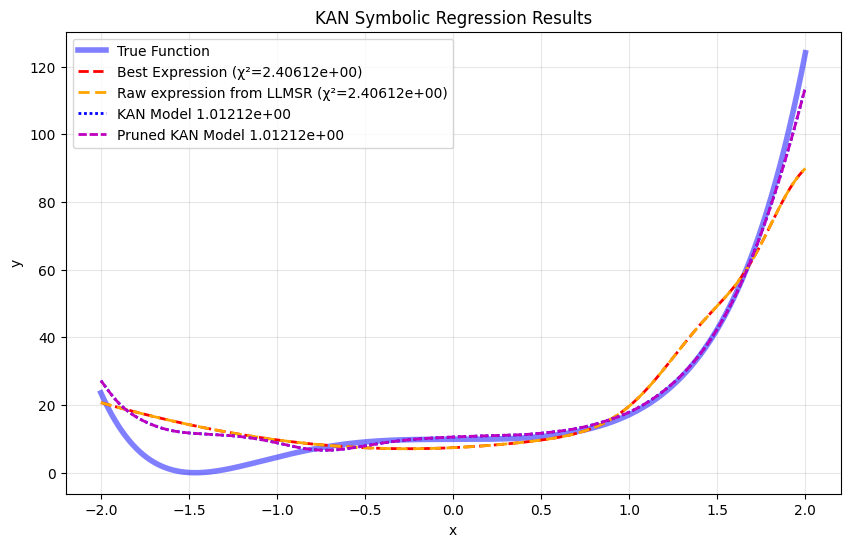

In [7]:
kan_sr.plot_results(ranges, kan_sr.results_all_dicts[0],title="KAN Symbolic Regression Results")

In [8]:
best_expressions, best_chi_squareds, results_all_dicts

(['-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009'],
 [Array(2.4061227, dtype=float32)],
 [{'raw_expression': '-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009',
   'raw_n_chi_squared': Array(2.4061227, dtype=float32),
   'final_KAN_expression': '1.0*x0**6 + 6.2832*x0**3 + 9.8696',
   'n_chi_squared_KAN_final': Array(7.7674735e-11, dtype=float32),
   'final_LLM_expression': 'x0**6 + 6.2832*x0**3 + 9.8696',
   'n_chi_squared_LLM_final': 48.7672462

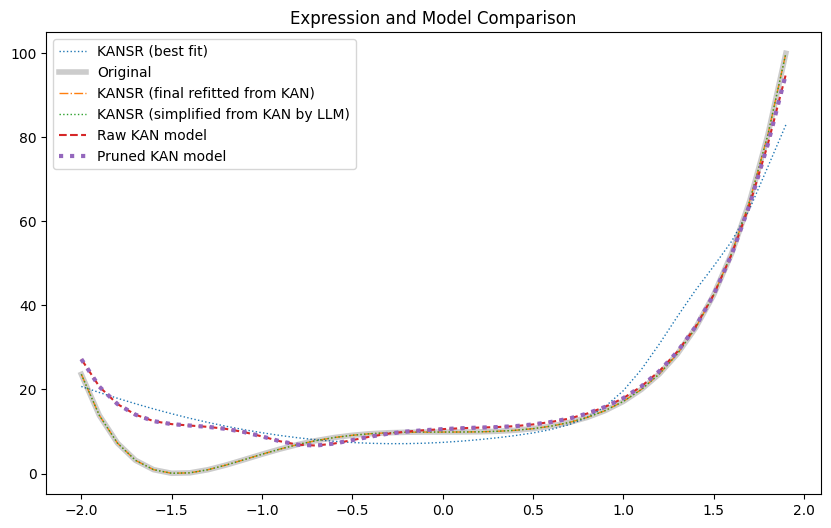

In [ ]:
import numpy as np
f_orig = lambda x0: (x0**3 + torch.pi)**2
f_kan_fitted= lambda x0: eval(results_all_dicts[0]['final_KAN_expression'])
f_llm_fitted = lambda x0: eval(results_all_dicts[0]['final_LLM_expression'])
f_best_fitted = lambda x0: eval(best_expressions[0])
xs = np.arange(ranges[0], ranges[1], .1)

# Convert to tensor for model evaluation
xs_tensor = torch.tensor(xs, dtype=torch.float32).unsqueeze(1).to(device)

# Evaluate the KAN models
raw_kan_outputs = kan_sr.raw_model(xs_tensor).cpu().detach().numpy().flatten()
pruned_kan_outputs = kan_sr.model(xs_tensor).cpu().detach().numpy().flatten()

# Plot all expressions and models
plt.figure(figsize=(10, 6))
plt.plot(xs, [f_best_fitted(x) for x in xs], linestyle=':', label="KANSR (best fit)", linewidth=1)  
plt.plot(xs, [f_orig(x) for x in xs], linestyle='-', c='black', label="Original", linewidth=4, alpha=0.2)
plt.plot(xs, [f_kan_fitted(x) for x in xs], linestyle='-.', label="KANSR (final refitted from KAN)", linewidth=1)
plt.plot(xs, [f_llm_fitted(x) for x in xs], linestyle=':', label="KANSR (simplified from KAN by LLM)", linewidth=1)
plt.plot(xs, raw_kan_outputs, linestyle='--', label="Raw KAN model", linewidth=1.5)
plt.plot(xs, pruned_kan_outputs, linestyle=':', label="Pruned KAN model", linewidth=3)
plt.legend()
plt.title("Expression and Model Comparison")
plt.show()


# Try $e^{1.83169-3.35509/x}$

/var/folders/n5/4xlf9f2j41z1r42htkz4vw0m0000gn/T/ipykernel_6753/626955180.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  f = lambda x: np.exp(1.83169-3.35509/x)


cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.90e-06 | test_loss: 5.76e-06 | reg: 9.11e+00 | : 100%|█| 50/50 [00:25<00:00,  1.93it


saving model version 0.1


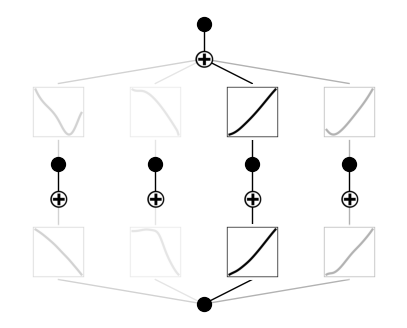

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# initialize KAN with G=3
model = KAN(width=[1,4,1], grid=7, k=3, seed=17, device=device, symbolic_enabled=False)

# create dataset
f = lambda x: np.exp(1.83169-3.35509/x)
ranges = [0.1, 2.]
dataset = create_dataset(f, n_var=1, ranges=ranges, train_num=10000, test_num=1000, device=device)
res_kan_training = model.fit(dataset, opt="LBFGS", steps=50);
model.plot()